In [25]:
import numpy as np

from tifffile import imread, imwrite
from matplotlib import pyplot as plt
from skimage.restoration import denoise_nl_means
from skimage.util import random_noise
from nanopyx.core.transform._le_nlm_denoising import NLMDenoising
from nanopyx.core.transform._le_fast_nlm_denoising import NLMDenoising as FastNLMDenoising

from nanopyx.core.utils.timeit import timeit2

from nanopyx.data.download import ExampleDataManager

downloader = ExampleDataManager()
image = downloader.get_ZipTiffIterator(
    "SMLMS2013_HDTubulinAlexa647", as_ndarray=True).astype(np.float32)

#%matplotlib widget

If you find the 'SMLMS2013_HDTubulinAlexa647' dataset useful, please cite: Nicolas Olivier, & Debora Keller, Zenodo, 2023 - https://doi.org/10.5281/zenodo.7620025


In [26]:
# img = imread("../../SMLM.tif")
# img = random_noise(np.random.random((1, 100, 100)), mode="gaussian", mean=2, var=2, seed=3)
# patch_size = 5
# patch_distance = 11
# h = 0.1
# sigma = 2

# denoiser = NLMDenoising(testing=True, clear_benchmarks=True)
# for i in range(3):
#     denoiser.benchmark(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma)

Agent: NLMDenoising using Unthreaded ran in 0.17484075005631894 seconds
Agent: NLMDenoising using Python ran in 0.3239150419831276 seconds
Agent: NLMDenoising using Threaded ran in 0.0354473328916356 seconds
Agent: NLMDenoising using Python ran in 0.04649462504312396 seconds


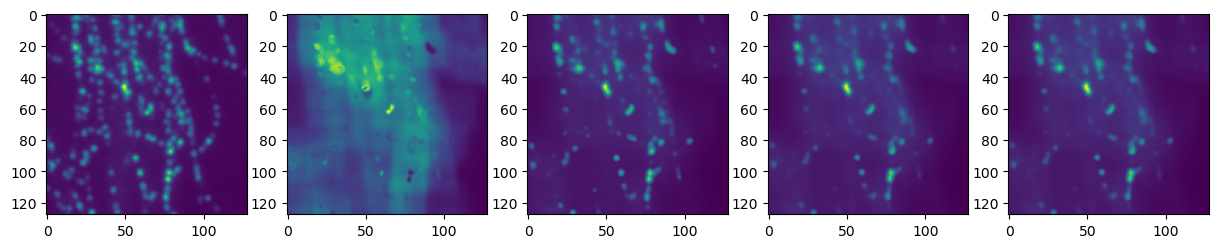

In [30]:
denoiser = NLMDenoising(testing=True)
fdenoiser = FastNLMDenoising(testing=True)
patch_size = 5
patch_distance = 11
h = 0.1
sigma = 0.1

img = (image[0] - image[0].min())/image[0].max()

thr = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")
pyt = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")

thr_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Threaded")
pyt_fast = fdenoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Python")

fig,axs = plt.subplots(1,5,figsize=(15,15))
axs[0].imshow(img)

# non fast
axs[1].imshow(thr)
axs[2].imshow(pyt)

# fast
axs[3].imshow(thr_fast)
axs[4].imshow(pyt_fast)
plt.show()


In [29]:
denoiser = NLMDenoising(testing=True)
fdenoiser = FastNLMDenoising(testing=True)
patch_size = 5
patch_distance = 11
h = 0.1
sigma = 0.1
img = (image[0] - image[0].min())/image[0].max()

thr = denoiser.run(img, patch_size=patch_size, patch_distance=patch_distance, h=h, sigma=sigma, run_type="Unthreaded")


Agent: NLMDenoising using Unthreaded ran in 0.1748029999434948 seconds
